#**Number Detection**


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import models,optimizers,datasets,layers

In [ ]:
(X_train_full,y_train_full),(X_test_full,y_test_full)=datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
#splitting the training dataset for training and validation
X_train,X_valid=X_train_full[:50000],X_train_full[50000:]
y_train,y_valid=y_train_full[:50000],y_train_full[50000:]

In [ ]:
#shape of the training dataset
X_train.shape

(50000, 28, 28)

Here the output indicates that the trainng dataset has 50000 samples and each element is having dimensions of 28*28 . Mnist dataset is of images and model need to identifty the ouput as a number by recognizing the image.

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

From the training data we can observe that the values are not in a proper scale so we normalize them into same range.

In [ ]:
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test_full/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

After normalization we can observe that they are in the same range and the difference between the values is not much higher as earlier.

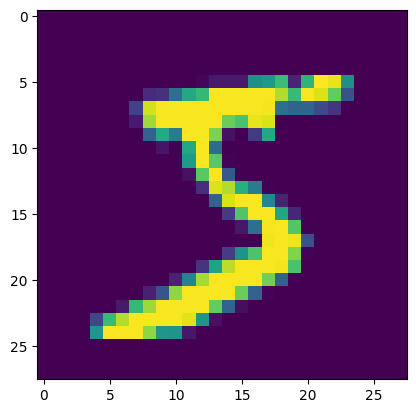

In [ ]:
plt.imshow(X_train[0])

In [ ]:
y_train[0]

5

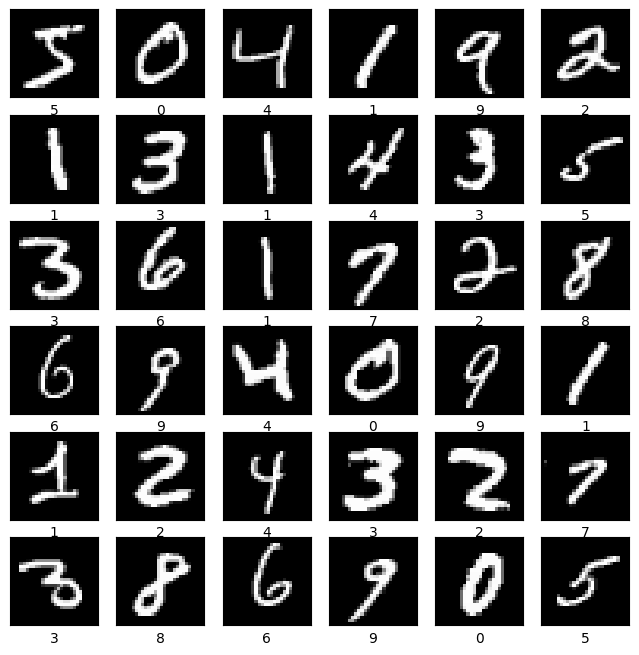

In [ ]:
#To display first 36 images from the training dataset
plt.figure(figsize=(8,8))

for i in range(36):
  plt.subplot(6, 6, i+1)
  plt.imshow(X_train[i], cmap="gray")
  plt.xlabel(y_train[i])
  plt.xticks([])
  plt.yticks([])


In [ ]:
y_train[:36]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5], dtype=uint8)

The above are the 36 elements and we can verify the images using y_train[index]

# **HyperParameters Tuning**

**Building the models with different numbers of layers and testing the performance.**

In [ ]:
# number of layers
val_acc=[]
model_0_1 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_0_1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_0_1.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

In [ ]:
model_0_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


From the model summary we can understand that we are having 3 layers . Flatten layer makes the multidimensional input to one dimension.



*   Here for the minst dataset we are have the pixel size of each image is 28*28. so Flatten layer converts it into single dimension as 784(i.e, 28*28=784)
*   Here Param column shows the number of trainable and non trainable parameters and we have 7850 parameters.



In [ ]:
model_0_2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_0_2.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_0_2.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 8s 4ms/step - loss: 0.2656 - accuracy: 0.9220 - val_loss: 0.1362 - val_accuracy: 0.9595
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1103 - accuracy: 0.9665 - val_loss: 0.0947 - val_accuracy: 0.9734
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0747 - accuracy: 0.9766 - val_loss: 0.0860 - val_accuracy: 0.9757
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0581 - accuracy: 0.9815 - val_loss: 0.1086 - val_accuracy: 0.9687
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0452 - accuracy: 0.9859 - val_loss: 0.0807 - val_accuracy: 0.9759


In [ ]:
model_0_3 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_0_3.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_0_3.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2748 - accuracy: 0.9196 - val_loss: 0.1335 - val_accuracy: 0.9587
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1132 - accuracy: 0.9654 - val_loss: 0.1172 - val_accuracy: 0.9669
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0789 - accuracy: 0.9758 - val_loss: 0.0952 - val_accuracy: 0.9726
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0620 - accuracy: 0.9805 - val_loss: 0.0986 - val_accuracy: 0.9730
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0487 - accuracy: 0.9843 - val_loss: 0.0926 - val_accuracy: 0.9751


In [ ]:
model_0_4 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_0_4.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_0_4.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 8s 4ms/step - loss: 0.3656 - accuracy: 0.8898 - val_loss: 0.1713 - val_accuracy: 0.9524
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1300 - accuracy: 0.9610 - val_loss: 0.1195 - val_accuracy: 0.9660
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0900 - accuracy: 0.9723 - val_loss: 0.1002 - val_accuracy: 0.9703
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0701 - accuracy: 0.9785 - val_loss: 0.1006 - val_accuracy: 0.9702
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0569 - accuracy: 0.9820 - val_loss: 0.0926 - val_accuracy: 0.9735


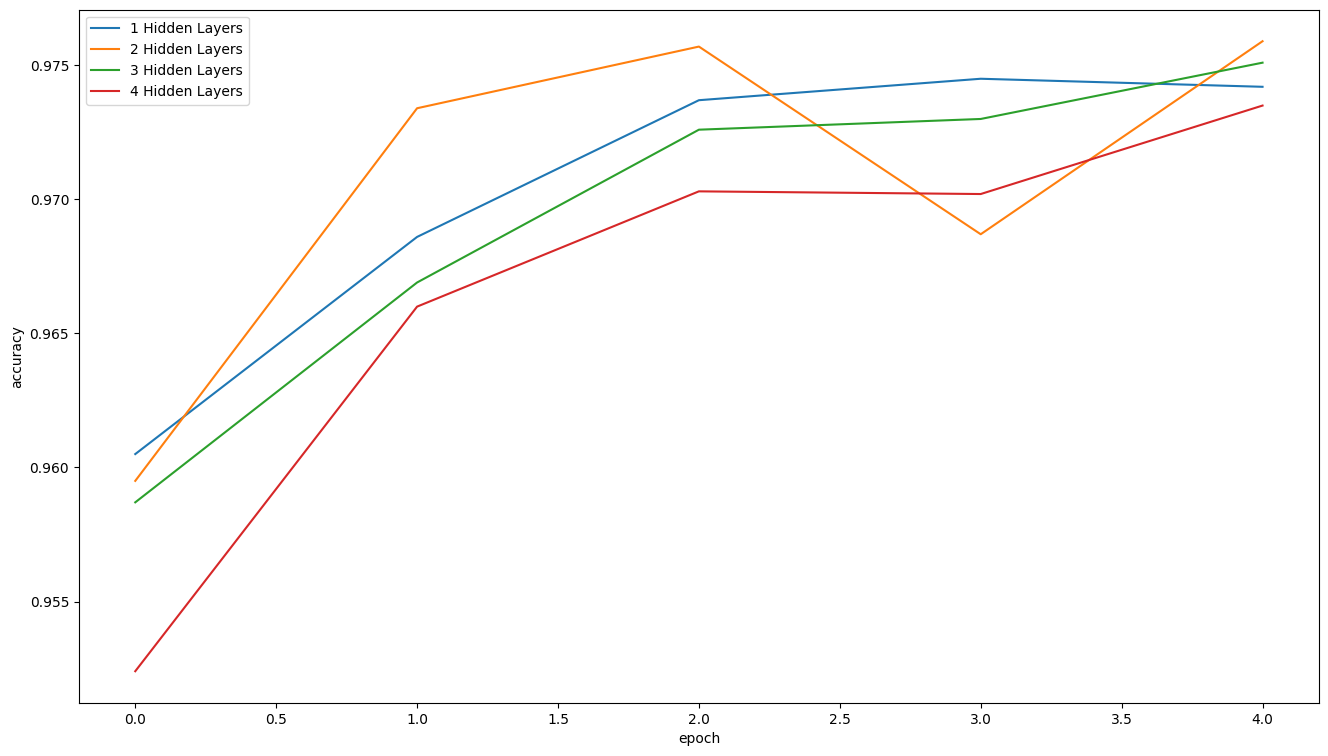

In [ ]:
plt.figure(figsize=(16, 9))

for i in range(4):
    plt.plot(val_acc[i], label=f'{i+1} Hidden Layers')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()


**Considering number of nodes in hidden layers**

In [ ]:
#number of neurons in each batch wise
val_acc=[]
model_031 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_031.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_031.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 0.2881 - accuracy: 0.9131 - val_loss: 0.1329 - val_accuracy: 0.9611
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1175 - accuracy: 0.9641 - val_loss: 0.1084 - val_accuracy: 0.9666
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0815 - accuracy: 0.9744 - val_loss: 0.1043 - val_accuracy: 0.9704
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0610 - accuracy: 0.9812 - val_loss: 0.0866 - val_accuracy: 0.9741
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0479 - accuracy: 0.9843 - val_loss: 0.0884 - val_accuracy: 0.9739


In [ ]:
model_032 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_032.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_032.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 6s 3ms/step - loss: 0.3577 - accuracy: 0.8957 - val_loss: 0.1692 - val_accuracy: 0.9520
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1569 - accuracy: 0.9539 - val_loss: 0.1369 - val_accuracy: 0.9630
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1124 - accuracy: 0.9662 - val_loss: 0.1249 - val_accuracy: 0.9657
Epoch 4/5
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0886 - accuracy: 0.9730 - val_loss: 0.1265 - val_accuracy: 0.9649
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0728 - accuracy: 0.9776 - val_loss: 0.0989 - val_accuracy: 0.9742


In [ ]:
model_033 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_033.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_033.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2393 - accuracy: 0.9277 - val_loss: 0.1235 - val_accuracy: 0.9626
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0996 - accuracy: 0.9690 - val_loss: 0.0923 - val_accuracy: 0.9728
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0704 - accuracy: 0.9775 - val_loss: 0.0924 - val_accuracy: 0.9723
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0523 - accuracy: 0.9835 - val_loss: 0.0980 - val_accuracy: 0.9733
Epoch 5/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0418 - accuracy: 0.9866 - val_loss: 0.0886 - val_accuracy: 0.9752


In [ ]:
model_034 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_034.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_034.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2195 - accuracy: 0.9331 - val_loss: 0.1172 - val_accuracy: 0.9640
Epoch 2/5
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0927 - accuracy: 0.9716 - val_loss: 0.0907 - val_accuracy: 0.9734
Epoch 3/5
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0638 - accuracy: 0.9800 - val_loss: 0.0907 - val_accuracy: 0.9753
Epoch 4/5
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0480 - accuracy: 0.9846 - val_loss: 0.1003 - val_accuracy: 0.9734
Epoch 5/5
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0389 - accuracy: 0.9876 - val_loss: 0.1024 - val_accuracy: 0.9722


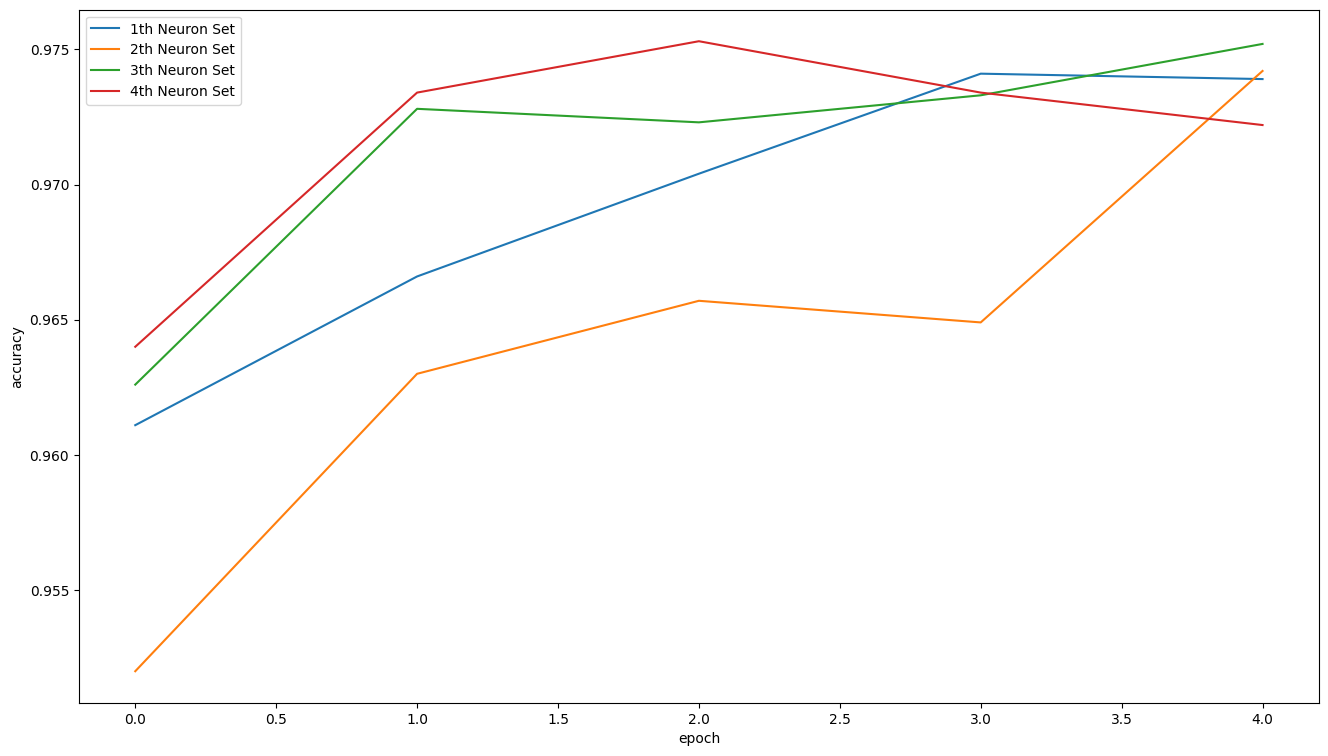

In [ ]:
plt.figure(figsize=(16, 9))

for i in range(4):
    plt.plot(val_acc[i], label=f'{i+1}th Neuron Set')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

###From the above graph, we can observe that third neuron set which has 128, 64, 32 as the batch nodes has performed best accuracy compared to all other batch node combinations. so we shall consider the same combination for next execution procedures.

In [ ]:
 #Evaluation using various optimizers


In [ ]:
#optimizer based evaluation
val_acc=[]
model_0331 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_0331.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_0331.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 39s 24ms/step - loss: 0.2298 - accuracy: 0.9314 - val_loss: 0.1236 - val_accuracy: 0.9654
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0997 - accuracy: 0.9687 - val_loss: 0.0977 - val_accuracy: 0.9712
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0666 - accuracy: 0.9791 - val_loss: 0.0892 - val_accuracy: 0.9733
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0529 - accuracy: 0.9831 - val_loss: 0.1168 - val_accuracy: 0.9665
Epoch 5/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0407 - accuracy: 0.9872 - val_loss: 0.1032 - val_accuracy: 0.9721


In [ ]:
model_0332 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_0332.compile(optimizer='adadelta',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_0332.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 11s 7ms/step - loss: 2.2635 - accuracy: 0.1480 - val_loss: 2.2004 - val_accuracy: 0.2350
Epoch 2/5
1563/1563 [==============================] - 10s 7ms/step - loss: 2.1432 - accuracy: 0.3304 - val_loss: 2.0749 - val_accuracy: 0.4289
Epoch 3/5
1563/1563 [==============================] - 10s 7ms/step - loss: 2.0124 - accuracy: 0.4859 - val_loss: 1.9331 - val_accuracy: 0.5508
Epoch 4/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8668 - accuracy: 0.5790 - val_loss: 1.7784 - val_accuracy: 0.6341
Epoch 5/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7126 - accuracy: 0.6406 - val_loss: 1.6176 - val_accuracy: 0.6942


In [ ]:
model_0333 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_0333.compile(optimizer='adamax',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_0333.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3096 - accuracy: 0.9105 - val_loss: 0.1575 - val_accuracy: 0.9559
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1409 - accuracy: 0.9587 - val_loss: 0.1232 - val_accuracy: 0.9647
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0971 - accuracy: 0.9713 - val_loss: 0.1044 - val_accuracy: 0.9702
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0734 - accuracy: 0.9787 - val_loss: 0.0952 - val_accuracy: 0.9728
Epoch 5/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0569 - accuracy: 0.9835 - val_loss: 0.0843 - val_accuracy: 0.9764


In [ ]:
model_0334 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_0334.compile(optimizer='Ftrl',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_0334.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 12s 7ms/step - loss: 2.3024 - accuracy: 0.1132 - val_loss: 2.3024 - val_accuracy: 0.1064
Epoch 2/5
1563/1563 [==============================] - 15s 10ms/step - loss: 2.3022 - accuracy: 0.1136 - val_loss: 2.3023 - val_accuracy: 0.1064
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3020 - accuracy: 0.1136 - val_loss: 2.3022 - val_accuracy: 0.1064
Epoch 4/5
1563/1563 [==============================] - 15s 10ms/step - loss: 2.3020 - accuracy: 0.1136 - val_loss: 2.3022 - val_accuracy: 0.1064
Epoch 5/5
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3019 - accuracy: 0.1136 - val_loss: 2.3021 - val_accuracy: 0.1064


In [ ]:
model_0335 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_0335.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_0335.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6464 - accuracy: 0.8284 - val_loss: 0.2884 - val_accuracy: 0.9178
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2772 - accuracy: 0.9194 - val_loss: 0.2196 - val_accuracy: 0.9411
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2194 - accuracy: 0.9362 - val_loss: 0.1812 - val_accuracy: 0.9502
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1824 - accuracy: 0.9464 - val_loss: 0.1647 - val_accuracy: 0.9565
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1569 - accuracy: 0.9545 - val_loss: 0.1422 - val_accuracy: 0.9612


In [ ]:
model_0336 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_0336.compile(optimizer='RMSprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_0336.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2368 - accuracy: 0.9288 - val_loss: 0.1188 - val_accuracy: 0.9644
Epoch 2/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1035 - accuracy: 0.9697 - val_loss: 0.0909 - val_accuracy: 0.9721
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0747 - accuracy: 0.9784 - val_loss: 0.1033 - val_accuracy: 0.9752
Epoch 4/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0607 - accuracy: 0.9822 - val_loss: 0.1021 - val_accuracy: 0.9768
Epoch 5/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0500 - accuracy: 0.9860 - val_loss: 0.1178 - val_accuracy: 0.9751


In [ ]:
model_0337 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_0337.compile(optimizer='NAdam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_0337.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 14s 8ms/step - loss: 0.2301 - accuracy: 0.9320 - val_loss: 0.1327 - val_accuracy: 0.9606
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0962 - accuracy: 0.9708 - val_loss: 0.0993 - val_accuracy: 0.9690
Epoch 3/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0685 - accuracy: 0.9790 - val_loss: 0.1001 - val_accuracy: 0.9705
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0531 - accuracy: 0.9835 - val_loss: 0.0967 - val_accuracy: 0.9739
Epoch 5/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0432 - accuracy: 0.9861 - val_loss: 0.0819 - val_accuracy: 0.9772


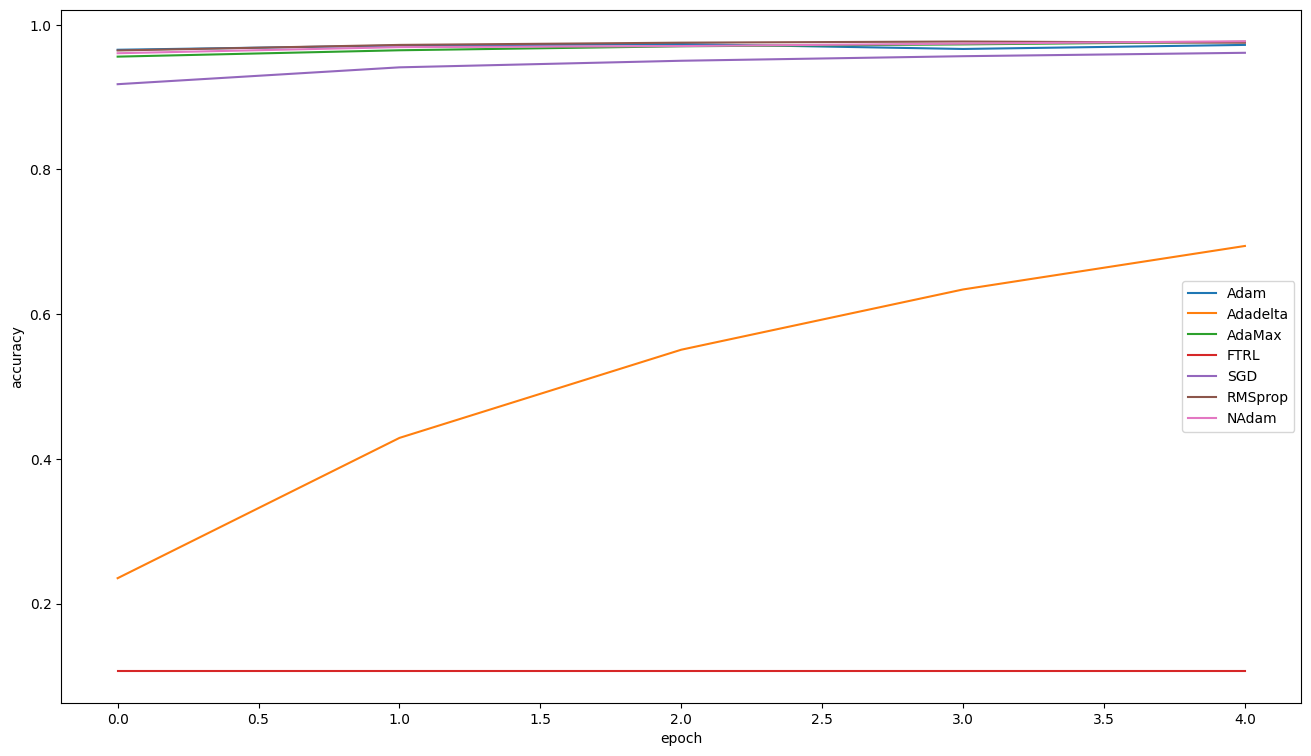

In [ ]:
optimizers=['Adam', 'Adadelta', 'AdaMax', 'FTRL', 'SGD', 'RMSprop', 'NAdam']
plt.figure(figsize=(16, 9))

for i in range(7):
    plt.plot(val_acc[i], label=optimizers[i])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

### Here we can observe thatAdam, Adamax, Nadam, SGD  optimizers were performing high accuracy. As Adam is having the highest accuracy we shall consider Adam optimizer.

In [ ]:
import tensorflow as tf

In [ ]:
#tuning hyper-parametrs of Adam optimization
val_acc=[]
model_03331 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_03331.compile(tf.keras.optimizers.Adam(learning_rate=0.001,
                                               beta_1=0.9,
                                               beta_2=0.999,
                                               epsilon=1e-07,
                                               name='Adam',),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

info=model_03331.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2301 - accuracy: 0.9303 - val_loss: 0.1221 - val_accuracy: 0.9627
Epoch 2/5
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0985 - accuracy: 0.9696 - val_loss: 0.1091 - val_accuracy: 0.9683
Epoch 3/5
1563/1563 [==============================] - 13s 9ms/step - loss: 0.0694 - accuracy: 0.9789 - val_loss: 0.0869 - val_accuracy: 0.9747
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0530 - accuracy: 0.9836 - val_loss: 0.0950 - val_accuracy: 0.9733
Epoch 5/5
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0402 - accuracy: 0.9868 - val_loss: 0.1104 - val_accuracy: 0.9718


In [ ]:
model_03332 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_03332.compile(tf.keras.optimizers.Adam(learning_rate=0.0001,
                                               beta_1=0.9,
                                               beta_2=0.999,
                                               epsilon=1e-07,
                                               name='Adam',),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

info=model_03332.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 11s 6ms/step - loss: 0.4828 - accuracy: 0.8733 - val_loss: 0.2118 - val_accuracy: 0.9406
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1922 - accuracy: 0.9455 - val_loss: 0.1529 - val_accuracy: 0.9580
Epoch 3/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1427 - accuracy: 0.9593 - val_loss: 0.1304 - val_accuracy: 0.9626
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1135 - accuracy: 0.9673 - val_loss: 0.1134 - val_accuracy: 0.9682
Epoch 5/5
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0926 - accuracy: 0.9731 - val_loss: 0.1014 - val_accuracy: 0.9717


In [ ]:
model_03333 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_03333.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_03333.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 28s 7ms/step - loss: 0.2262 - accuracy: 0.9332 - val_loss: 0.1403 - val_accuracy: 0.9577
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0953 - accuracy: 0.9706 - val_loss: 0.0895 - val_accuracy: 0.9736
Epoch 3/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0672 - accuracy: 0.9793 - val_loss: 0.0797 - val_accuracy: 0.9758
Epoch 4/5
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0522 - accuracy: 0.9832 - val_loss: 0.0988 - val_accuracy: 0.9738
Epoch 5/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0420 - accuracy: 0.9867 - val_loss: 0.0836 - val_accuracy: 0.9780


In [ ]:
model_03334 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_03334.compile(tf.keras.optimizers.Adam(learning_rate=0.01,
                                               beta_1=0.85,
                                               beta_2=0.888,
                                               epsilon=1e-07,
                                               name='Adam',),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

info=model_03334.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 12s 7ms/step - loss: 0.3781 - accuracy: 0.9081 - val_loss: 0.3381 - val_accuracy: 0.9348
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3618 - accuracy: 0.9315 - val_loss: 0.4325 - val_accuracy: 0.9166
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4535 - accuracy: 0.9201 - val_loss: 0.4442 - val_accuracy: 0.9032
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5927 - accuracy: 0.9004 - val_loss: 0.6371 - val_accuracy: 0.8897
Epoch 5/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8422 - accuracy: 0.8553 - val_loss: 1.1489 - val_accuracy: 0.8137


In [ ]:
model_03335 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_03335.compile(tf.keras.optimizers.Adam(learning_rate=0.01,
                                               beta_1=0.9,
                                               beta_2=0.999,
                                               epsilon=1e-07,
                                               name='Adam',),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

info=model_03335.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3191 - accuracy: 0.9104 - val_loss: 0.2239 - val_accuracy: 0.9377
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2165 - accuracy: 0.9450 - val_loss: 0.1968 - val_accuracy: 0.9528
Epoch 3/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1764 - accuracy: 0.9555 - val_loss: 0.1895 - val_accuracy: 0.9524
Epoch 4/5
1563/1563 [==============================] - 16s 10ms/step - loss: 0.1619 - accuracy: 0.9606 - val_loss: 0.2212 - val_accuracy: 0.9546
Epoch 5/5
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1663 - accuracy: 0.9618 - val_loss: 0.1948 - val_accuracy: 0.9578


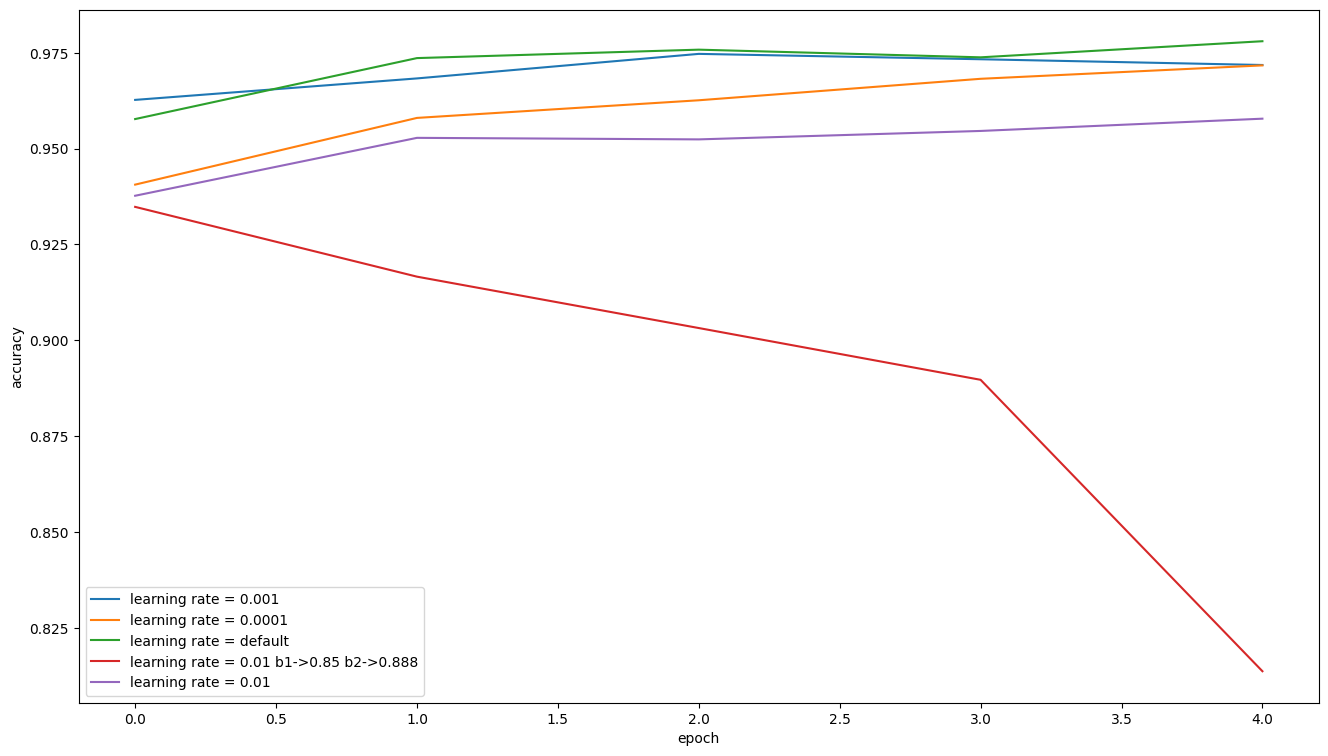

In [ ]:
lr=['learning rate = 0.001', 'learning rate = 0.0001', 'learning rate = default', 'learning rate = 0.01 b1->0.85 b2->0.888', 'learning rate = 0.01']
plt.figure(figsize=(16, 9))

for i in range(5):
    plt.plot(val_acc[i], label=lr[i])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

Using L1 and L2 Regularizations

In [ ]:
#with l1-regularizer
from keras.regularizers import l1
from keras.layers import Dropout, BatchNormalization

val_acc=[]
model_033331 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu', kernel_regularizer='l1'),
    layers.Dense(128, activation='relu', kernel_regularizer='l1'),
    layers.Dense(64, activation='relu', kernel_regularizer='l1'),
    layers.Dense(10, activation='softmax')
])

model_033331.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_033331.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 15s 8ms/step - loss: 4.7832 - accuracy: 0.1217 - val_loss: 2.5956 - val_accuracy: 0.1064
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 2.5938 - accuracy: 0.1136 - val_loss: 2.5935 - val_accuracy: 0.1064
Epoch 3/5
1563/1563 [==============================] - 12s 8ms/step - loss: 2.5937 - accuracy: 0.1136 - val_loss: 2.5934 - val_accuracy: 0.1064
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 2.5936 - accuracy: 0.1136 - val_loss: 2.5953 - val_accuracy: 0.1064
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 2.5936 - accuracy: 0.1136 - val_loss: 2.5952 - val_accuracy: 0.1064


In [ ]:
#with l2-regularizer
from keras.regularizers import l2

model_033332 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu', kernel_regularizer='l2'),
    layers.Dense(128, activation='relu', kernel_regularizer='l2'),
    layers.Dense(64, activation='relu', kernel_regularizer='l2'),
    layers.Dense(10, activation='softmax')
])

model_033332.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_033332.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 13s 7ms/step - loss: 1.1251 - accuracy: 0.8833 - val_loss: 0.6584 - val_accuracy: 0.9218
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6275 - accuracy: 0.9167 - val_loss: 0.5715 - val_accuracy: 0.9278
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5497 - accuracy: 0.9278 - val_loss: 0.4973 - val_accuracy: 0.9423
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5012 - accuracy: 0.9341 - val_loss: 0.4615 - val_accuracy: 0.9441
Epoch 5/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4688 - accuracy: 0.9380 - val_loss: 0.4319 - val_accuracy: 0.9489


In [ ]:
model_033333 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_033333.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_033333.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 12s 7ms/step - loss: 0.2349 - accuracy: 0.9294 - val_loss: 0.1299 - val_accuracy: 0.9616
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0951 - accuracy: 0.9697 - val_loss: 0.0973 - val_accuracy: 0.9699
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0686 - accuracy: 0.9790 - val_loss: 0.1029 - val_accuracy: 0.9692
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0528 - accuracy: 0.9834 - val_loss: 0.0849 - val_accuracy: 0.9748
Epoch 5/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0406 - accuracy: 0.9873 - val_loss: 0.0852 - val_accuracy: 0.9749


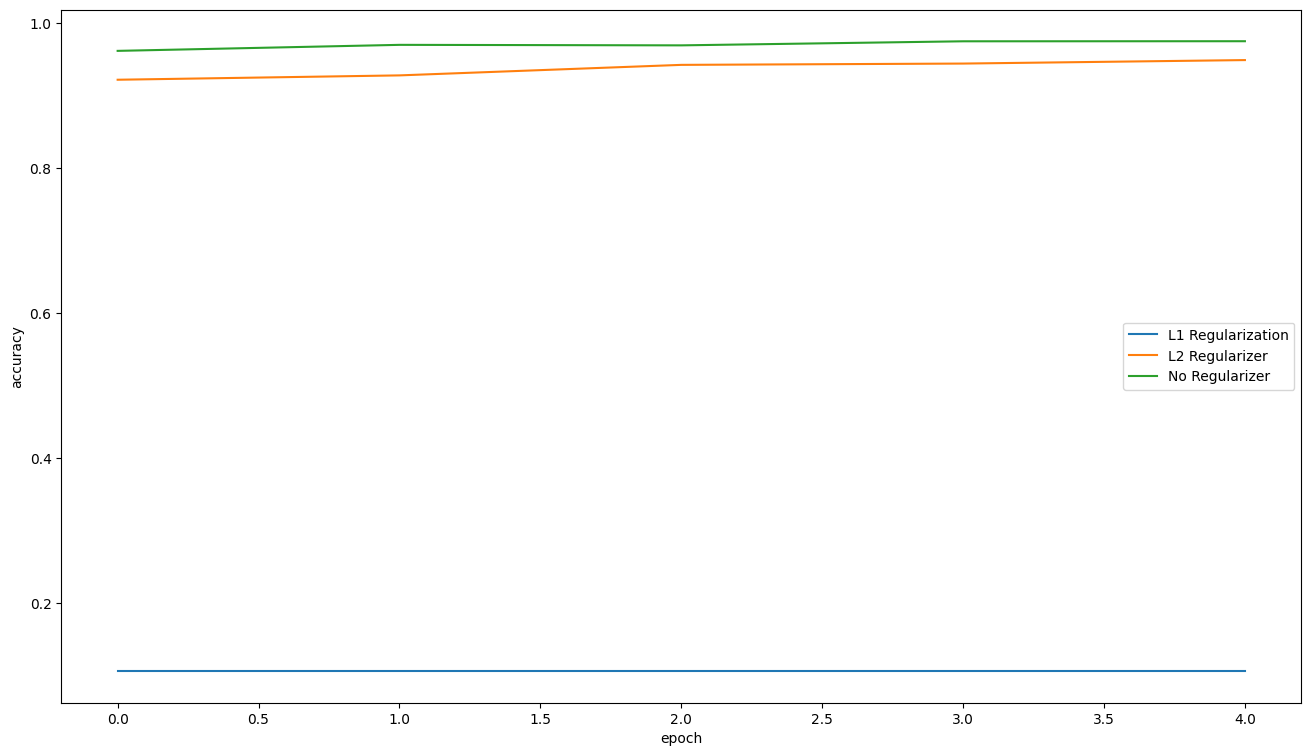

In [ ]:
reg=['L1 Regularization', 'L2 Regularizer', 'No Regularizer']
plt.figure(figsize=(16, 9))

for i in range(3):
    plt.plot(val_acc[i], label=reg[i])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

For this data we observe that model performs well when we wont use any Regularizers.

In [ ]:
#No regularizer, dropout, batch normalization
from keras.regularizers import l2
from keras.layers import Dropout, BatchNormalization

val_acc=[]
model_033331_bn1 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_033331_bn1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_033331_bn1.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 16s 9ms/step - loss: 0.2234 - accuracy: 0.9311 - val_loss: 0.1109 - val_accuracy: 0.9673
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1133 - accuracy: 0.9645 - val_loss: 0.1169 - val_accuracy: 0.9657
Epoch 3/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0889 - accuracy: 0.9716 - val_loss: 0.0995 - val_accuracy: 0.9708
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0707 - accuracy: 0.9775 - val_loss: 0.0899 - val_accuracy: 0.9739
Epoch 5/5
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0598 - accuracy: 0.9807 - val_loss: 0.0927 - val_accuracy: 0.9736


In [ ]:
model_033331_bn2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_033331_bn2.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_033331_bn2.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2417 - accuracy: 0.9268 - val_loss: 0.1150 - val_accuracy: 0.9654
Epoch 2/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1245 - accuracy: 0.9609 - val_loss: 0.0979 - val_accuracy: 0.9719
Epoch 3/5
1563/1563 [==============================] - 18s 11ms/step - loss: 0.0931 - accuracy: 0.9707 - val_loss: 0.0952 - val_accuracy: 0.9705
Epoch 4/5
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0745 - accuracy: 0.9759 - val_loss: 0.0894 - val_accuracy: 0.9741
Epoch 5/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0657 - accuracy: 0.9793 - val_loss: 0.0797 - val_accuracy: 0.9770


In [ ]:
model_033331_bn3 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

model_033331_bn3.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_033331_bn3.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 14s 8ms/step - loss: 0.2560 - accuracy: 0.9222 - val_loss: 0.1146 - val_accuracy: 0.9651
Epoch 2/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1284 - accuracy: 0.9600 - val_loss: 0.1014 - val_accuracy: 0.9691
Epoch 3/5
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0989 - accuracy: 0.9693 - val_loss: 0.0960 - val_accuracy: 0.9721
Epoch 4/5
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0820 - accuracy: 0.9738 - val_loss: 0.0953 - val_accuracy: 0.9731
Epoch 5/5
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0701 - accuracy: 0.9777 - val_loss: 0.0827 - val_accuracy: 0.9755


In [ ]:
model_033331_bn4 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_033331_bn4.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_033331_bn4.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 73s 9ms/step - loss: 0.2285 - accuracy: 0.9315 - val_loss: 0.1239 - val_accuracy: 0.9623
Epoch 2/5
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0983 - accuracy: 0.9699 - val_loss: 0.0903 - val_accuracy: 0.9729
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0655 - accuracy: 0.9795 - val_loss: 0.0894 - val_accuracy: 0.9733
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0546 - accuracy: 0.9828 - val_loss: 0.0897 - val_accuracy: 0.9745
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0395 - accuracy: 0.9872 - val_loss: 0.0889 - val_accuracy: 0.9759


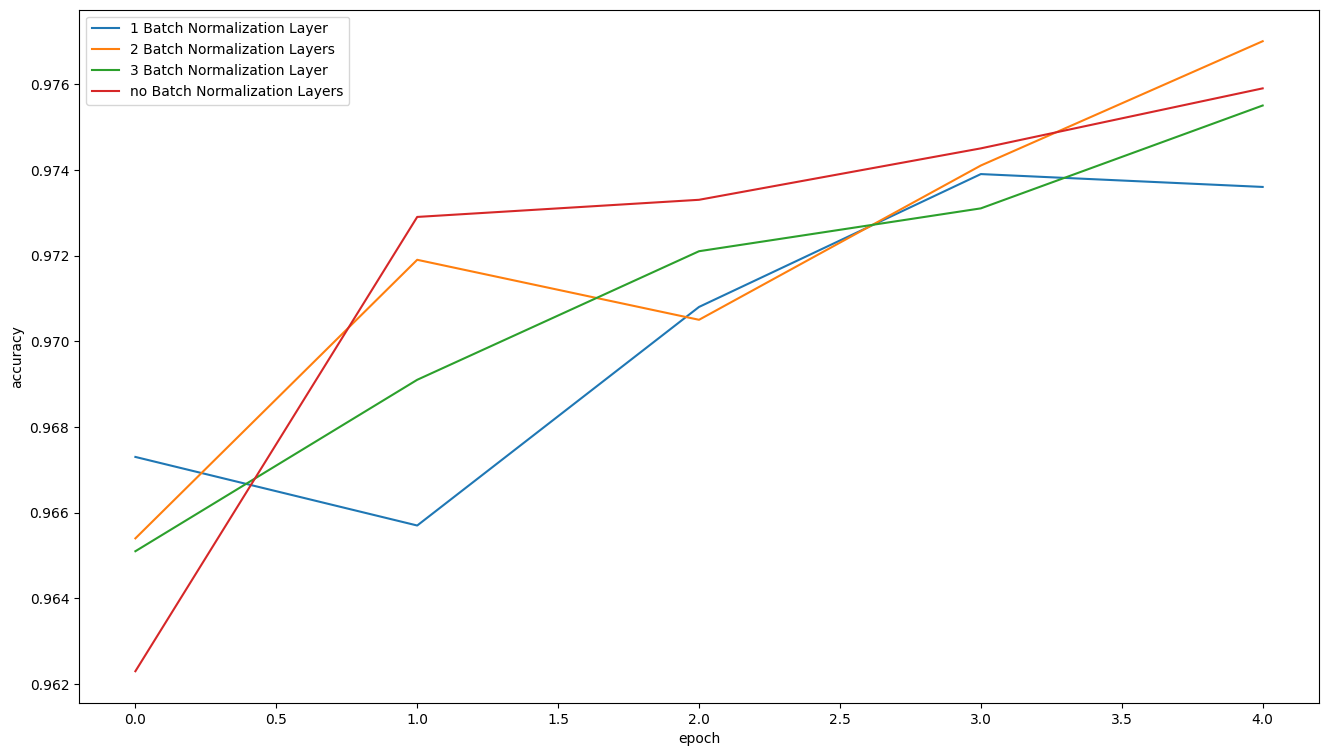

In [ ]:
bn=['1 Batch Normalization Layer', '2 Batch Normalization Layers', '3 Batch Normalization Layer', 'no Batch Normalization Layers']
plt.figure(figsize=(16, 9))

for i in range(4):
    plt.plot(val_acc[i], label=bn[i])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

From above plot we can see that we have better accuracy when we have 2 batch normalization layer compared to other set of batch ormalization layers

**Using Dropout Layer**

In [ ]:
val_acc=[]
model_033331_dp1 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_033331_dp1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_033331_dp1.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 12s 7ms/step - loss: 0.2663 - accuracy: 0.9189 - val_loss: 0.1075 - val_accuracy: 0.9667
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1227 - accuracy: 0.9626 - val_loss: 0.0875 - val_accuracy: 0.9752
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0954 - accuracy: 0.9693 - val_loss: 0.0911 - val_accuracy: 0.9739
Epoch 4/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0757 - accuracy: 0.9765 - val_loss: 0.0934 - val_accuracy: 0.9730
Epoch 5/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0687 - accuracy: 0.9780 - val_loss: 0.0971 - val_accuracy: 0.9732


In [ ]:
model_033331_dp2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_033331_dp2.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_033331_dp2.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 12s 7ms/step - loss: 0.2973 - accuracy: 0.9091 - val_loss: 0.1161 - val_accuracy: 0.9654
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1388 - accuracy: 0.9576 - val_loss: 0.0981 - val_accuracy: 0.9700
Epoch 3/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1068 - accuracy: 0.9678 - val_loss: 0.0883 - val_accuracy: 0.9755
Epoch 4/5
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0895 - accuracy: 0.9723 - val_loss: 0.0921 - val_accuracy: 0.9737
Epoch 5/5
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0765 - accuracy: 0.9761 - val_loss: 0.0788 - val_accuracy: 0.9775


In [ ]:
model_033331_dp3 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model_033331_dp3.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_033331_dp3.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3513 - accuracy: 0.8933 - val_loss: 0.1266 - val_accuracy: 0.9621
Epoch 2/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1580 - accuracy: 0.9552 - val_loss: 0.1112 - val_accuracy: 0.9663
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1246 - accuracy: 0.9634 - val_loss: 0.0879 - val_accuracy: 0.9745
Epoch 4/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0998 - accuracy: 0.9712 - val_loss: 0.0839 - val_accuracy: 0.9762
Epoch 5/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0894 - accuracy: 0.9738 - val_loss: 0.0820 - val_accuracy: 0.9783


In [ ]:
model_033331_dp4 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_033331_dp4.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

info=model_033331_dp4.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
val_acc.append(info.history['val_accuracy'])

Epoch 1/5
1563/1563 [==============================] - 11s 6ms/step - loss: 0.2323 - accuracy: 0.9303 - val_loss: 0.1191 - val_accuracy: 0.9644
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0965 - accuracy: 0.9701 - val_loss: 0.0902 - val_accuracy: 0.9729
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0680 - accuracy: 0.9786 - val_loss: 0.0932 - val_accuracy: 0.9748
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0504 - accuracy: 0.9836 - val_loss: 0.1031 - val_accuracy: 0.9708
Epoch 5/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0410 - accuracy: 0.9866 - val_loss: 0.0827 - val_accuracy: 0.9772


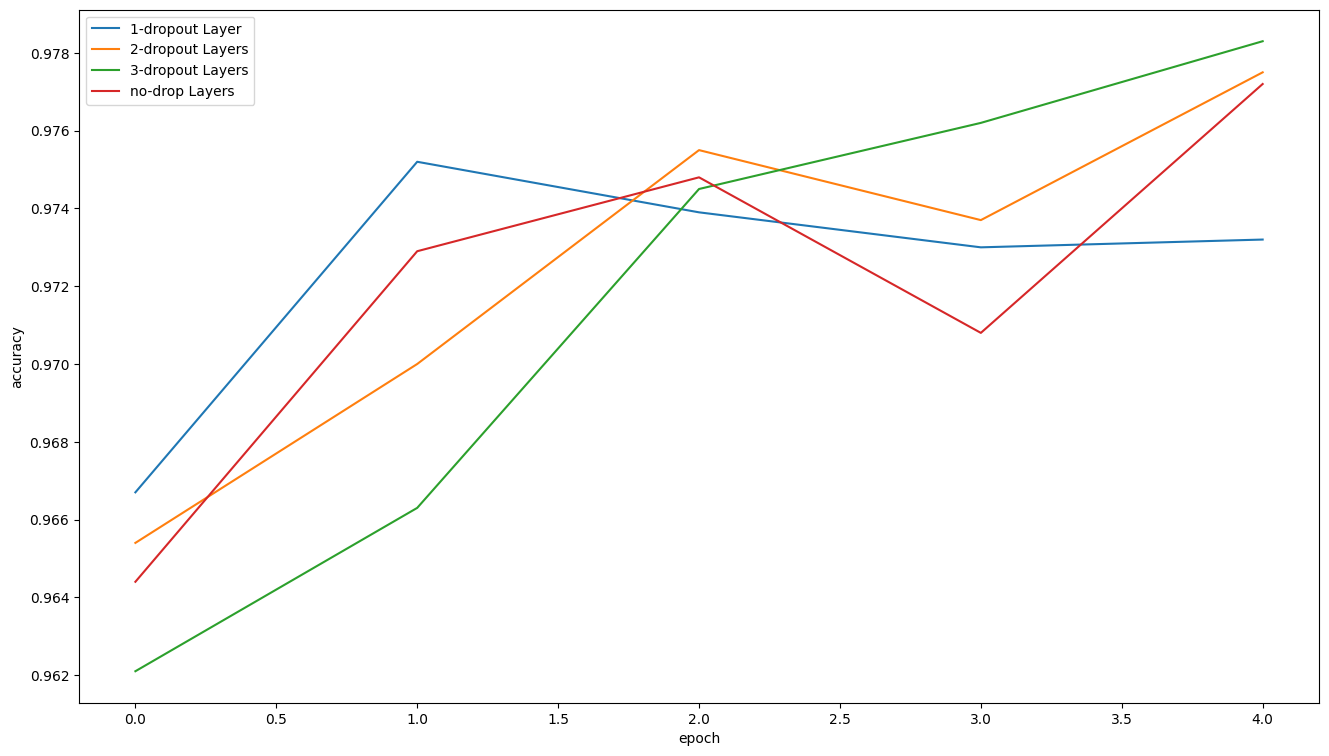

In [ ]:
dp=['1-dropout Layer', '2-dropout Layers', '3-dropout Layers', 'no-drop Layers']
plt.figure(figsize=(16, 9))

for i in range(4):
    plt.plot(val_acc[i], label=dp[i])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

### From this drop-out tuning, we can observe that 3 drop-out layers  are performing with best accuracy compared to other 0,1, 2  drop layers.

**Weights and Bias Initializations**

In [ ]:
from re import X
from keras.utils import to_categorical
import keras
from keras.initializers import glorot_normal, he_normal  # Import weight initializations
_x_train = X_train
_x_test = X_test
_y_train = to_categorical(y_train_full, num_classes=10)
_y_test = to_categorical(y_test_full, num_classes=10)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu", kernel_initializer=glorot_normal()),  # Use Glorot (Xavier) initialization
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu", kernel_initializer=glorot_normal()),  # Use He initialization
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax"),
])


model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(_x_train, _y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(_x_test, _y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Make predictions
predictions = model.predict(_x_test)


Epoch 1/10
1250/1250 [==============================] - 12s 8ms/step - loss: 0.2366 - accuracy: 0.9287 - val_loss: 0.1587 - val_accuracy: 0.9527
Epoch 2/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.1157 - accuracy: 0.9643 - val_loss: 0.1376 - val_accuracy: 0.9591
Epoch 3/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.0904 - accuracy: 0.9711 - val_loss: 0.1203 - val_accuracy: 0.9636
Epoch 4/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.0721 - accuracy: 0.9772 - val_loss: 0.1185 - val_accuracy: 0.9660
Epoch 5/10
1250/1250 [==============================] - 12s 9ms/step - loss: 0.0585 - accuracy: 0.9811 - val_loss: 0.1295 - val_accuracy: 0.9635
Epoch 6/10
1250/1250 [==============================] - 12s 10ms/step - loss: 0.0482 - accuracy: 0.9843 - val_loss: 0.1172 - val_accuracy: 0.9675
Epoch 7/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.0439 - accuracy: 0.9852 - val_loss: 0.1023 - val_acc

In [ ]:
import keras
from keras.initializers import glorot_normal, he_normal  # Import weight initializations
_x_train = X_train_full
_x_test = X_test_full
_y_train = to_categorical(y_train_full, num_classes=10)
_y_test = to_categorical(y_test_full, num_classes=10)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu", kernel_initializer=he_normal()),  # Use Glorot (Xavier) initialization
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu", kernel_initializer=he_normal()),  # Use He initialization
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax"),
])


model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(_x_train, _y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(_x_test, _y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Make predictions
predictions = model.predict(_x_test)


Epoch 1/10
1500/1500 [==============================] - 13s 7ms/step - loss: 0.2393 - accuracy: 0.9277 - val_loss: 0.1400 - val_accuracy: 0.9607
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1151 - accuracy: 0.9638 - val_loss: 0.1295 - val_accuracy: 0.9672
Epoch 3/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0882 - accuracy: 0.9713 - val_loss: 0.1319 - val_accuracy: 0.9675
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0711 - accuracy: 0.9778 - val_loss: 0.1289 - val_accuracy: 0.9702
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0619 - accuracy: 0.9797 - val_loss: 0.1825 - val_accuracy: 0.9740
Epoch 6/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0517 - accuracy: 0.9833 - val_loss: 0.1395 - val_accuracy: 0.9742
Epoch 7/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0456 - accuracy: 0.9853 - val_loss: 0.1611 - val_ac

Using he instead of glorot produced a slightly better accuracy for weight initializations. In both cases, the inital accuracy from epoch 1 performed better than with random weights.

In [ ]:
_x_train = X_train_full
_x_test = X_test_full
_y_train = to_categorical(y_train_full, num_classes=10)
_y_test = to_categorical(y_test_full, num_classes=10)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,use_bias=False),
    keras.layers.BatchNormalization(),  # Batch Normalization layer
    keras.layers.Activation("relu"),
    keras.layers.Dense(100,use_bias=False),
    keras.layers.BatchNormalization(),  # Batch Normalization layer
    keras.layers.Activation("relu"),
    keras.layers.Dense(10,use_bias=False),
    keras.layers.Activation("Softmax"),
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(_x_train, _y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(_x_test, _y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Make predictions
predictions = model.predict(_x_test)

Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2254 - accuracy: 0.9338 - val_loss: 0.1206 - val_accuracy: 0.9628
Epoch 2/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.1077 - accuracy: 0.9667 - val_loss: 0.0898 - val_accuracy: 0.9702
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0762 - accuracy: 0.9757 - val_loss: 0.0833 - val_accuracy: 0.9750
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0596 - accuracy: 0.9810 - val_loss: 0.0731 - val_accuracy: 0.9772
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0499 - accuracy: 0.9835 - val_loss: 0.0789 - val_accuracy: 0.9764
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0390 - accuracy: 0.9870 - val_loss: 0.0813 - val_accuracy: 0.9764
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0344 - accuracy: 0.9886 - val_loss: 0.0754 - val_ac

Without using any biases, the model was still able to perform extremely well. This is one of the advantages of Batch Normalization as it effectively replaces the need for biases in the dense layers.

**CONCLUSION**

By this tuning of different hyper-parameters in ANN, we have considered the best case studies as per the best validation accuracy, execution time and memory parameters. So, we have optimized the fashion dataset by ANN using 3 layers, {256,128,64}neuron set, Adam optimizer, default learning rate parameters, L2- regularizers and 2 batch normalization and no dropout layers as best case studies in our investigation. In this conclusion, we can say that the each validation accuracy will be having individual tuning test-case of hyper-parameters which can vary based on the requirement of following dataset constraints and other justifications.